In [65]:
import numpy as np
import matplotlib.pyplot as plt
import  keras
import os
from keras.models import Sequential , Model
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Input    #conv2d for image , conv3d for videos
import cv2
from sklearn.model_selection import train_test_split 

In [35]:
dirname = r'C:\Users\Alo\Desktop\ProjectML2\BrainTumor\Training'         # https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset?resource=download
categories = [ 'no_tumor' , 'tumor']
data_set = []
for category in categories:
    label = categories.index(category)
    folder = os.path.join(dirname,category)
    for image in os.listdir(folder):
        img_name = os.path.join(folder,image)
        img_nparray = cv2.imread(img_name)
        img_nparray = cv2.resize(img_nparray, (200,200))
        data_set.append([img_nparray,label])

In [36]:
x = []
y = []
for data in data_set:
    x.append(data[0])
    y.append(data[1])

In [37]:
x = np.array(x)
y = np.array(y)

In [38]:
x = x/255.0

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , shuffle = True)

In [40]:
# model = Sequential([
#     Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),    # 64 layers (feature detector) , feature detector 3x3 grid and after that avtivation with relu
#     MaxPooling2D((2,2)),     #filter compate in 2x2 blocks  
#     Conv2D(64,(3,3),activation = 'relu'),    # 64 layers (feature detector) , feature detector 
#     MaxPooling2D((2,2)) ,
#     Conv2D(64,(3,3),activation = 'relu'),    # 64 layers (feature detector) , feature detector 
#     MaxPooling2D((2,2)) , 
#     Flatten(),               # convert to 1d array  ( to flatten out the image )
#     Dense(32,activation = 'relu'),
#     Dense(1,activation = 'sigmoid')
# ])

In [41]:
# model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
# model.fit(x_train,y_train,epochs = 20,batch_size = 10)

In [43]:
model = keras.models.load_model('C:/Users/Alo/Desktop/ProjectML2/model_bt4.keras')

In [44]:
model.evaluate(x_test,y_test)

ValueError: in user code:

    File "C:\Users\Alo\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Alo\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Alo\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Alo\anaconda3\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Alo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Alo\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 200, 200, 3), found shape=(None, 224, 224, 3)


In [ ]:
import random 
idx = random.randint(0,len(x_test))
plt.imshow(x_test[idx ])
plt.show()
y_pred = model.predict(x_test[idx,:].reshape(1,200,200,3))
if y_pred > 0.5:
    y_pred = 'tumor'
else:
    y_pred = 'No tumor'
print(y_pred)

In [13]:
y_test[idx]

1

In [14]:
# model.save('C:/Users/Alo/Desktop/ProjectML2/model_bt4.keras')

In [15]:
data_set_alzheimers = []
dir_name2 = r'C:\Users\Alo\Desktop\ProjectML2\az\train'
categories2 = ['no_alz' , 'alz']

In [16]:
for category in categories2:
    fold = os.path.join(dir_name2,category)
    label = categories2.index(category)
    for image in os.listdir(fold):
        img_n = os.path.join(fold,image)
        img_nparray2 = cv2.imread(img_n)
        img_nparray2 = cv2.resize(img_nparray2 , (300,300))
        data_set_alzheimers.append([img_nparray2,label])        

In [17]:
x_al = []
y_al = []
for data in data_set_alzheimers:
    x_al.append(data[0])
    y_al.append(data[1])

In [18]:
x_al = np.array(x_al)
y_al = np.array(y_al)

In [19]:
x_al = x_al/255.0

In [20]:
x_train_al , x_test_al , y_train_al , y_test_al = train_test_split(x_al,y_al,test_size = 0.3 , shuffle = True)

In [21]:
# model2 = Sequential([
#     Conv2D(64,(3,3),activation = 'relu'),
#     MaxPooling2D((2,2)),
#     Conv2D(64,(3,3),activation = 'relu'),
#     MaxPooling2D((2,2)),
#     Conv2D(64,(3,3),activation = 'relu'),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(32,activation ='relu'),
#     Dense(1,activation = 'sigmoid')
# ])

In [22]:
# model2.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# model2.fit(x_train_al,y_train_al,epochs = 20,batch_size = 10)

In [24]:
model2 = keras.models.load_model('C:/Users/Alo/Desktop/ProjectML2/model_al3.keras')

In [25]:
model2.evaluate(x_test_al,y_test_al)

16/16 [==============================] - 22s 938ms/step - loss: 0.0144 - accuracy: 0.9959


[0.014387485571205616, 0.9958847761154175]

In [26]:
# model2.save('C:/Users/Alo/Desktop/ProjectML2/model_al3.keras')

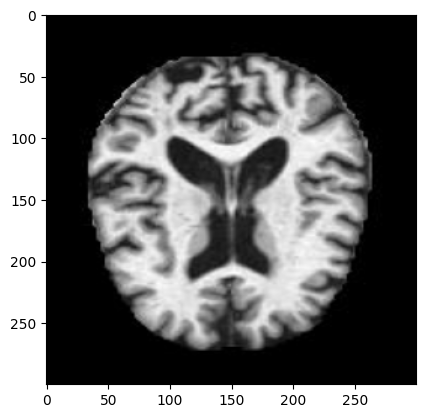

1/1 [==============================] - 0s 364ms/step
Alzheimer


In [27]:

idx2 = random.randint(0,len(x_test_al))
plt.imshow(x_test_al[idx2])
plt.show()
y_pred = model2.predict(x_test_al[idx2,:].reshape(1,300,300,3))
if y_pred > 0.5:
    y_pred = 'Alzheimer'
else:
    y_pred = 'No Alzheimer\'s'
print(y_pred)

In [28]:
y_test_al[idx2]

1

In [29]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# x_train_inp = []
# for i in range(len(x_train)):
#     x_train_inp.append(np.reshape(x_train[i],(1,-1)));
# x_train_inp = np.array(x_train_inp);
# x_train_inp = np.reshape(x_train_inp,(x_train_inp.shape[0],-1))
# x_test_inp = []
# for i in range(len(x_test)):
#     x_test_inp.append(np.reshape(x_test[i],(1,-1)));
# x_test_inp = np.array(x_test_inp);
# x_test_inp = np.reshape(x_test_inp,(x_test_inp.shape[0],-1))
# x_train_inp.shape
# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
# svc=svm.SVC(probability=True)
# model_svm=GridSearchCV(svc,param_grid)
# model_svm.fit(x_train_inp,y_train)
# model_svm.evaluate(x_test_inp,y_test)

In [71]:
from keras.applications.vgg16 import VGG16 , preprocess_input
from glob import glob
from keras.preprocessing.image import ImageDataGenerator




In [45]:
image_size = [224,224]

In [47]:
vgg = VGG16(input_shape = image_size + [3] , weights = 'imagenet' , include_top = False)

58889256/58889256 [==============================] - 6s 0us/step


In [48]:
for layer in vgg.layers:
    layer.trainable = False

In [58]:
folders = glob('C:/Users/Alo/Desktop/ProjectML2/BrainTumor/Training/*')
folders

['C:/Users/Alo/Desktop/ProjectML2/BrainTumor/Training\\no_tumor',
 'C:/Users/Alo/Desktop/ProjectML2/BrainTumor/Training\\tumor']

In [68]:
x = Flatten()(vgg.output)
predictions = Dense(len(folders),activation = 'softmax')(x)
modelVgg = Model(inputs = vgg.input , outputs = predictions )

In [69]:
modelVgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [70]:
modelVgg.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [72]:
train_data = ImageDataGenerator(rescale = 1./255 ,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [76]:
training_set = train_data.flow_from_directory('C:/Users/Alo/Desktop/ProjectML2/BrainTumor/Training',
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')
test_set = test_data.flow_from_directory('C:/Users/Alo/Desktop/ProjectML2/BrainTumor/Testing',
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 1701 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


In [78]:
mh = modelVgg.fit(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

C:\Users\Alo\AppData\Local\Temp\ipykernel_27824\201561355.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mh = modelVgg.fit_generator(


Epoch 1/5
54/54 [==============================] - 784s 14s/step - loss: 0.2804 - accuracy: 0.8807 - val_loss: 0.2650 - val_accuracy: 0.9069
Epoch 2/5
54/54 [==============================] - 757s 14s/step - loss: 0.1388 - accuracy: 0.9483 - val_loss: 0.1675 - val_accuracy: 0.9359
Epoch 3/5
54/54 [==============================] - 723s 13s/step - loss: 0.1040 - accuracy: 0.9641 - val_loss: 0.1278 - val_accuracy: 0.9542
Epoch 4/5
54/54 [==============================] - 715s 13s/step - loss: 0.0884 - accuracy: 0.9706 - val_loss: 0.1828 - val_accuracy: 0.9298
Epoch 5/5
54/54 [==============================] - 713s 13s/step - loss: 0.0677 - accuracy: 0.9782 - val_loss: 0.1305 - val_accuracy: 0.9481


In [79]:
modelVgg.save('C:/Users/Alo/Desktop/ProjectML2/model_vgg.keras')

In [81]:
y_pred_vgg = modelVgg.predict(x_test)

16/16 [==============================] - 111s 7s/step


In [88]:
y_pred_vgg[0]

array([0.00343449, 0.9965655 ], dtype=float32)

In [89]:
for i in range(0,len(y_pred_vgg)):
    if(y_pred_vgg[i][0]>y_pred_vgg[i][1]):
        print("no tumor")
    else:
        print("tumor")

tumor
no tumor
no tumor
no tumor
tumor
tumor
tumor
no tumor
tumor
tumor
no tumor
no tumor
no tumor
no tumor
tumor
tumor
tumor
no tumor
no tumor
tumor
tumor
tumor
tumor
tumor
tumor
no tumor
tumor
tumor
no tumor
no tumor
no tumor
tumor
tumor
no tumor
no tumor
no tumor
tumor
tumor
no tumor
tumor
no tumor
no tumor
tumor
tumor
tumor
no tumor
no tumor
tumor
tumor
tumor
tumor
tumor
no tumor
tumor
no tumor
no tumor
tumor
tumor
tumor
no tumor
tumor
no tumor
no tumor
tumor
tumor
no tumor
no tumor
no tumor
tumor
no tumor
no tumor
no tumor
no tumor
tumor
tumor
tumor
no tumor
tumor
tumor
no tumor
tumor
tumor
tumor
no tumor
tumor
tumor
tumor
no tumor
tumor
no tumor
no tumor
tumor
no tumor
no tumor
no tumor
no tumor
no tumor
tumor
no tumor
tumor
no tumor
no tumor
tumor
tumor
no tumor
tumor
tumor
no tumor
no tumor
no tumor
tumor
tumor
tumor
tumor
no tumor
tumor
no tumor
no tumor
no tumor
no tumor
no tumor
no tumor
tumor
tumor
tumor
tumor
no tumor
tumor
tumor
no tumor
no tumor
tumor
tumor
no tumor
no t

In [95]:
mh.history['val_accuracy']

[0.906941294670105,
 0.9359267950057983,
 0.9542334079742432,
 0.9298245906829834,
 0.9481312036514282]